# BIKE SET

In [ ]:
#EDA
#Profile of data
#statistical
#graphical

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv("/content/BIKE DETAILS.csv")
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


**Q1.** What is the range of selling prices in the dataset


In [8]:
import pandas as pd

df = pd.read_csv("/content/BIKE DETAILS (1).csv")
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [9]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range: ₹{price_range}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range: ₹755000


**Q2.**What is the median selling price for bikes in the dataset

In [10]:
median_price = df['selling_price'].median()
print(f"Median Selling Price: ₹{median_price}")

Median Selling Price: ₹45000.0


**Q3.**What is the most common seller type

In [11]:
most_common_seller = df['seller_type'].mode()[0]
seller_counts = df['seller_type'].value_counts()

print("Most Common Seller Type:", most_common_seller)
print("\nSeller Type Counts:\n", seller_counts)

Most Common Seller Type: Individual

Seller Type Counts:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**Q4.**How many bikes have driven more than 50,000 kilometers

In [12]:
# Count bikes with more than 50,000 km driven
high_km_bikes = df[df['km_driven'] > 50000]
count_high_km = high_km_bikes.shape[0]

print(f"Number of bikes driven more than 50,000 km: {count_high_km}")


Number of bikes driven more than 50,000 km: 170


**Q5.**What is the average km_driven value for each ownership type

In [13]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

print("Average km_driven for each ownership type:")
print(avg_km_by_owner)

Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**Q6.**What proportion of bikes are from the year 2015 or older

In [14]:
# Total number of bikes
total_bikes = len(df)

# Bikes from 2015 or earlier
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]

# Proportion
proportion = bikes_2015_or_older / total_bikes

print(f"Bikes from 2015 or earlier: {bikes_2015_or_older}")
print(f"Total bikes: {total_bikes}")
print(f"Proportion: {proportion:.2%}")


Bikes from 2015 or earlier: 601
Total bikes: 1061
Proportion: 56.64%


**Q7** What is the trend of missing values across the dataset

In [15]:
# Count missing values per column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
ex_showroom_price    435
dtype: int64


**Q8.** What is the highest ex_showroom_price recorded, and for which bike

In [17]:
# Drop rows with missing ex_showroom_price just in case
df_clean = df.dropna(subset=['ex_showroom_price'])

# Get the row with the highest ex_showroom_price
highest_price_row = df_clean.loc[df_clean['ex_showroom_price'].idxmax()]

# Display results
bike_name = highest_price_row['name']
highest_price = highest_price_row['ex_showroom_price']

print(f"Bike with highest ex-showroom price: {bike_name}")
print(f"Ex-showroom price: ₹{highest_price:,.0f}")


Bike with highest ex-showroom price: Harley-Davidson Street Bob
Ex-showroom price: ₹1,278,000


**Q9.**What is the total number of bikes listed by each seller type


In [18]:
# Count the number of bikes by each seller type
seller_counts = df['seller_type'].value_counts()

print("Number of bikes listed by each seller type:\n")
print(seller_counts)


Number of bikes listed by each seller type:

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**Q10** What is the relationship between selling_price and km_driven for first-owner bikes

**Q11.** Identify and remove outliers in the km_driven column using the IQR method


In [19]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 4: Show how many rows were removed
removed_rows = df.shape[0] - df_no_outliers.shape[0]

print(f"Outliers removed: {removed_rows}")
print(f"Remaining rows: {df_no_outliers.shape[0]}")


Outliers removed: 39
Remaining rows: 1022


**Q12.** Perform a bivariate analysis to visualize the relationship between year and selling_price


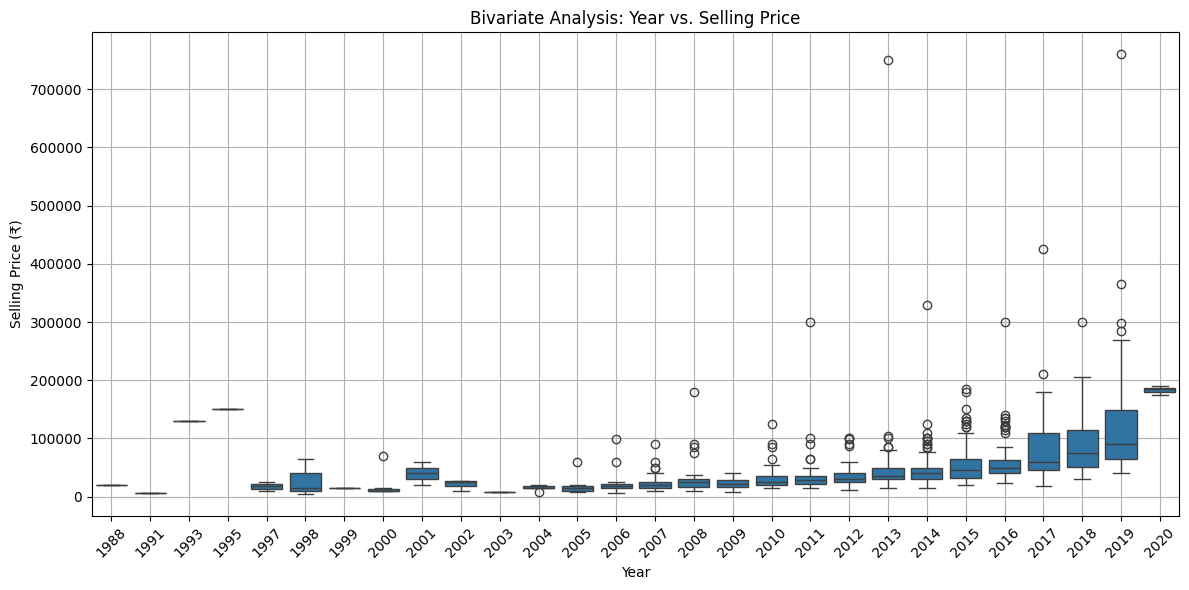

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title('Bivariate Analysis: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Q13.** What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)



In [ ]:
# Calculate current year
current_year = datetime.now().year

# Create a new column for bike age
df['bike_age'] = current_year - df['year']

# Group by bike age and calculate average selling price
avg_depreciation = df.groupby('bike_age')['selling_price'].mean().reset_index()

# Display result
print("Average Selling Price by Bike Age:\n")
print(avg_depreciation)


**Q14.** Which bike names are priced significantly above the average price for their manufacturing year


In [25]:
# Calculate average selling price per year
yearly_avg_price = df.groupby('year')['selling_price'].mean().reset_index()
yearly_avg_price.rename(columns={'selling_price': 'avg_year_price'}, inplace=True)

# Merge back to main dataframe
df_with_avg = pd.merge(df, yearly_avg_price, on='year')

# Define "significantly above average" as more than 1.5x the average for that year
threshold = 1.5
high_price_bikes = df_with_avg[df_with_avg['selling_price'] > threshold * df_with_avg['avg_year_price']]

# Show relevant results
result = high_price_bikes[['name', 'year', 'selling_price', 'avg_year_price']].sort_values(by='selling_price', ascending=False)
print(result.head(10))


                                 name  year  selling_price  avg_year_price
295                   Suzuki GSX S750  2019         760000   119689.511628
134        Harley-Davidson Street Bob  2013         750000    51136.986301
289    Kawasaki Ninja 650 [2018-2019]  2017         425000    78894.736842
13                      Yamaha YZF R3  2019         365000   119689.511628
311        Harley-Davidson Street 750  2014         330000    48668.131868
344                        BMW G310GS  2018         300000    87660.374046
860    Kawasaki Ninja 650 [2018-2019]  2011         300000    35655.721311
897                Kawasaki Ninja 300  2016         300000    58469.018692
130  Royal Enfield Continental GT 650  2019         299000   119689.511628
315     Royal Enfield Interceptor 650  2019         285000   119689.511628


**Q15.** Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Numeric Columns')
plt.tight_layout()
plt.show()


# AMAZON SALES

In [29]:
import pandas as pd

df = pd.read_csv("/content/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**Q1.** What is the average rating for each product category

In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")

# Preview the columns
print(df.columns)



Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [ ]:
# Group by category and calculate average rating
avg_rating_per_category = df.groupby('category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

# Display results
print(avg_rating_per_category)


**Q2.** What are the top rating_count products by category

In [34]:
# Drop rows with missing category or rating count
df_clean = df.dropna(subset=['category', 'rating_count'])

# Convert rating_count to numeric (in case it's stored as text with commas)
df_clean['rating_count'] = df_clean['rating_count'].replace('[^\d]', '', regex=True).astype(int)

# Get top product by rating count in each category
top_products_by_category = df_clean.sort_values('rating_count', ascending=False).groupby('category').head(1)

# Display key info
print(top_products_by_category[['category', 'product_name', 'rating_count']])


                                               category  \
47    Electronics|HomeTheater,TV&Video|Accessories|C...   
400   Electronics|Headphones,Earbuds&Accessories|Hea...   
371   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
...                                                 ...   
863   Computers&Accessories|Components|InternalHardD...   
1014   Computers&Accessories|Laptops|TraditionalLaptops   
557   Electronics|Mobiles&Accessories|MobileAccessor...   
269        Electronics|HomeAudio|Speakers|TowerSpeakers   
264   Electronics|HomeAudio|MediaStreamingDevices|St...   

                                           product_name  rating_count  
47    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...        426973  
400   boAt Bassheads 100 in Ear Wired Earphones with...        363713  
371   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...        313836  
102

<ipython-input-34-8df987aec0fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rating_count'] = df_clean['rating_count'].replace('[^\d]', '', regex=True).astype(int)


**Q3.**What is the distribution of discounted prices vs. actual prices

In [37]:
# Clean and convert price columns to numeric
df['actual_price'] = df['actual_price'].replace('[^\d.]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[^\d.]', '', regex=True).astype(float)

# Drop rows with missing prices
df = df.dropna(subset=['actual_price', 'discounted_price'])


**Q4.** How does the average discount percentage vary across categories

In [40]:
# Drop rows with missing categories
df = df.dropna(subset=['category'])

# Group by category and compute average discount
avg_discount_by_category = df.groupby('category')['discount_percent'].mean().reset_index().sort_values(by='discount_percent', ascending=False)

# Display the result
print(avg_discount_by_category)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


                                              category  discount_percent
6    Computers&Accessories|Accessories&Peripherals|...         90.090090
75   Electronics|Headphones,Earbuds&Accessories|Ear...         90.090090
106  Electronics|Mobiles&Accessories|MobileAccessor...         90.090090
73   Electronics|Headphones,Earbuds&Accessories|Ada...         87.987988
14   Computers&Accessories|Accessories&Peripherals|...         87.722505
..                                                 ...               ...
197  OfficeProducts|OfficeElectronics|Calculators|F...          0.000000
199  OfficeProducts|OfficePaperProducts|Paper|Copy&...          0.000000
205  OfficeProducts|OfficePaperProducts|Paper|Stati...          0.000000
206  OfficeProducts|OfficePaperProducts|Paper|Stati...          0.000000
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...          0.000000

[211 rows x 2 columns]


**Q5.**What are the most popular product names

In [48]:

import pandas as pd

df = pd.read_csv("/content/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Clean rating_count (remove commas or symbols if needed)
df['rating_count'] = df['rating_count'].replace('[^\d]', '', regex=True).astype(int)

# Drop rows with missing product names
df = df.dropna(subset=['product_name'])


**Q6.**What are the most popular product keywords

In [51]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/amazon.csv")

# View columns
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


**Q7.**What are the most popular product reviews

In [ ]:
# Filter for highly-rated products
highly_rated_reviews = df[df['rating'] >= 4]

# Sort and display
top_positive_reviews = highly_rated_reviews.sort_values(by='rating_count', ascending=False)
top_positive_reviews[['product_name', 'review', 'rating', 'rating_count']].head()


**Q8.** What is the correlation between discounted_price and rating

In [ ]:
correlation = df_clean['discounted_price'].corr(df_clean['rating'])
print(f"Correlation between discounted price and rating: {correlation:.4f}")


**Q9.**' What are the Top 5 categories based on the highest rating

In [ ]:
# Group by category and get average rating
avg_rating = df_clean.groupby('category')['rating'].mean().reset_index()

# Sort by rating in descending order
top_categories = avg_rating.sort_values(by='rating', ascending=False).head(5)

# Display top 5 categories
print(top_categories)


**Q10.** Identify any potential areas for improvement or optimization based on the data analysi

 Optimize Underperforming Categories
Observation: Some categories have significantly lower average ratings.

Action: Identify common issues (via review text or low-rated products) and improve product quality or customer expectations.